# Computational Astrophysics
## 05.  Reading and Viewing FITS spectra 01
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

### About this notebook

In this worksheet we use the `astropy` package to read a .fits file and visualize an astronomical spectrum.

---

## The .FITS data
As a first example, we will use a .fits spectrum of a galaxy obtained from the SDSS Database. Go to

https://dr16.sdss.org/

and click in the **Optical Spectra** section. Click to see the spectra of the PlateID 271. From the spectra table, download the file corresponding to the FiberID 5, which has a specobj_id 305120280735410176. Thus, the complete identification for this spectrum is given by

Plate: 271\
MJD: 51883\
Fiber: 5

You can also find this spectrum using this identification in the page

https://dr16.sdss.org/optical/spectrum/search


This .fits file corresponds to the spectrum of the galaxy SDSS J102008.09-004750.7. The complete information of this object can be seen by clicking in the corresponding CAS link in the spectra table, which leads to

http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?plate=271&mjd=51883&fiber=5

For a detalied description of working with .fits files using `astropy`, go to

http://docs.astropy.org/en/stable/io/fits/index.html

---

### Open a .fits file.

We will use the function `fits.open()` from the `astropy.io` package to open the FITS file and see its info. This time, we include the option `memmap=True` to prevent RAM storage issues

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.table import Table

In [2]:
hdul = fits.open('spec-0271-51883-0005.fits', memmap=True)
hdul.info()

Filename: spec-0271-51883-0005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     140   ()      
  1  COADD         1 BinTableHDU     26   3827R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


Note that this file has 3 HDU objets. In the primary we have the general information of the file:

In [3]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4482562363.15 / 1st row - Number of seconds since Nov 17 1858  
RA      =            154.26373 / 1st row - Right ascension of telescope boresigh
DEC     =            0.023615  / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '11:50:32.96'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                51883 / MJD of observation                             
MJDLIST = '51879 51883'     

In the `hdul[1]` header we find the spectrum information

In [4]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3827 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

### Extracting the spectrum from the FITS file

Now, we will extract the spectrum data from the HDU object. A detailed description of this process is foun at 

http://learn.astropy.org/rst-tutorials/FITS-tables.html?highlight=filtertutorials

The hdul[1] object contains a table and the names of the columns can be seen with the method `.columns`

In [5]:
hdul[1].columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

Detailed information about this spectrum is found in the spec data model link,

https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/spectra/PLATE4/spec.html

For example, the column ['flux'] is given in units of $10^{-17}$ ergs/s/cm2/Å and the column ['loglam'] gives the $\log_{10}$ of the wavelength in Å.

However, assigning the data in the hdul[1] object to a variable doesn't give a recognizable type object.

In [6]:
spectrum_data = hdul[1].data
type(spectrum_data)

astropy.io.fits.fitsrec.FITS_rec

In fact, to load a spectrum we need to use the `Table` function from the `astropy.table` package. More information on this at

https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table

In [7]:
from astropy.table import Table

spectrum_data = Table(hdul[1].data)

The information is stored in a table object.

In [8]:
type(spectrum_data)

astropy.table.table.Table

The data can be seen explicitly:

In [9]:
spectrum_data

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
21.53708,3.5819,0.08127065,0,0,1.2916901,10.570335,33.403244
24.77743,3.582,0.07876171,0,0,1.2898893,9.759857,33.523865
26.569952,3.5821,0.07849586,0,0,1.2939965,8.42035,32.584286
28.445292,3.5822,0.07468648,0,0,1.2940756,7.2095666,32.663204
26.992609,3.5823,0.07433821,0,0,1.2883157,6.943819,33.386795
24.295444,3.5824,0.07521792,0,0,1.2860845,7.4816504,31.322495
25.63897,3.5825,0.072936855,0,0,1.2920122,8.507473,31.526957
23.736605,3.5826,0.06839536,0,0,1.2874743,9.370607,34.28415
22.78346,3.5827,0.07102863,0,0,1.2896937,8.3563795,35.00147


### Histogram Plot

Now we can plot the 'flux' data in this table as a histogram.

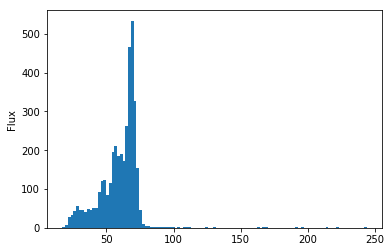

In [10]:
plt.hist(spectrum_data['flux'], bins='auto')
plt.ylabel('Flux')
plt.show()

### Spectrum Plot

In order to see the spectrum of this galaxy, we plot the ['flux'] column vs. ['loglam'] column.

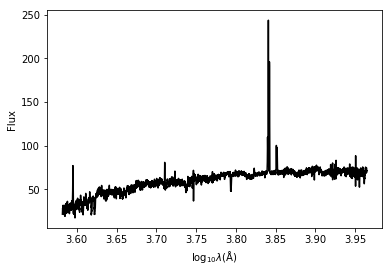

In [11]:
plt.plot(spectrum_data['loglam'],spectrum_data['flux'],'k')
plt.xlabel(r'$\log_{10} \lambda {(\rm \AA)}$')
plt.ylabel('Flux')
plt.show()

In order to plot flux vs. wavelength (and not the log of the wavelength), we define 

In [12]:
wavelength = np.power(10,spectrum_data['loglam'])

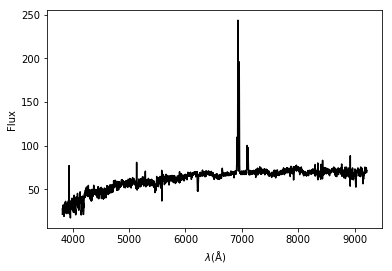

In [13]:
plt.plot(wavelength,spectrum_data['flux'],'k')
plt.xlabel(r'$\lambda {(\rm \AA)}$')
plt.ylabel('Flux')
plt.show()